In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.random as rnd

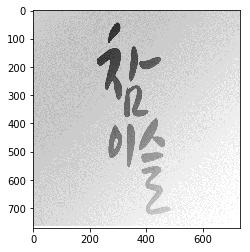

In [2]:
img= cv2.imread('img.png')
imgplot = plt.imshow(img)

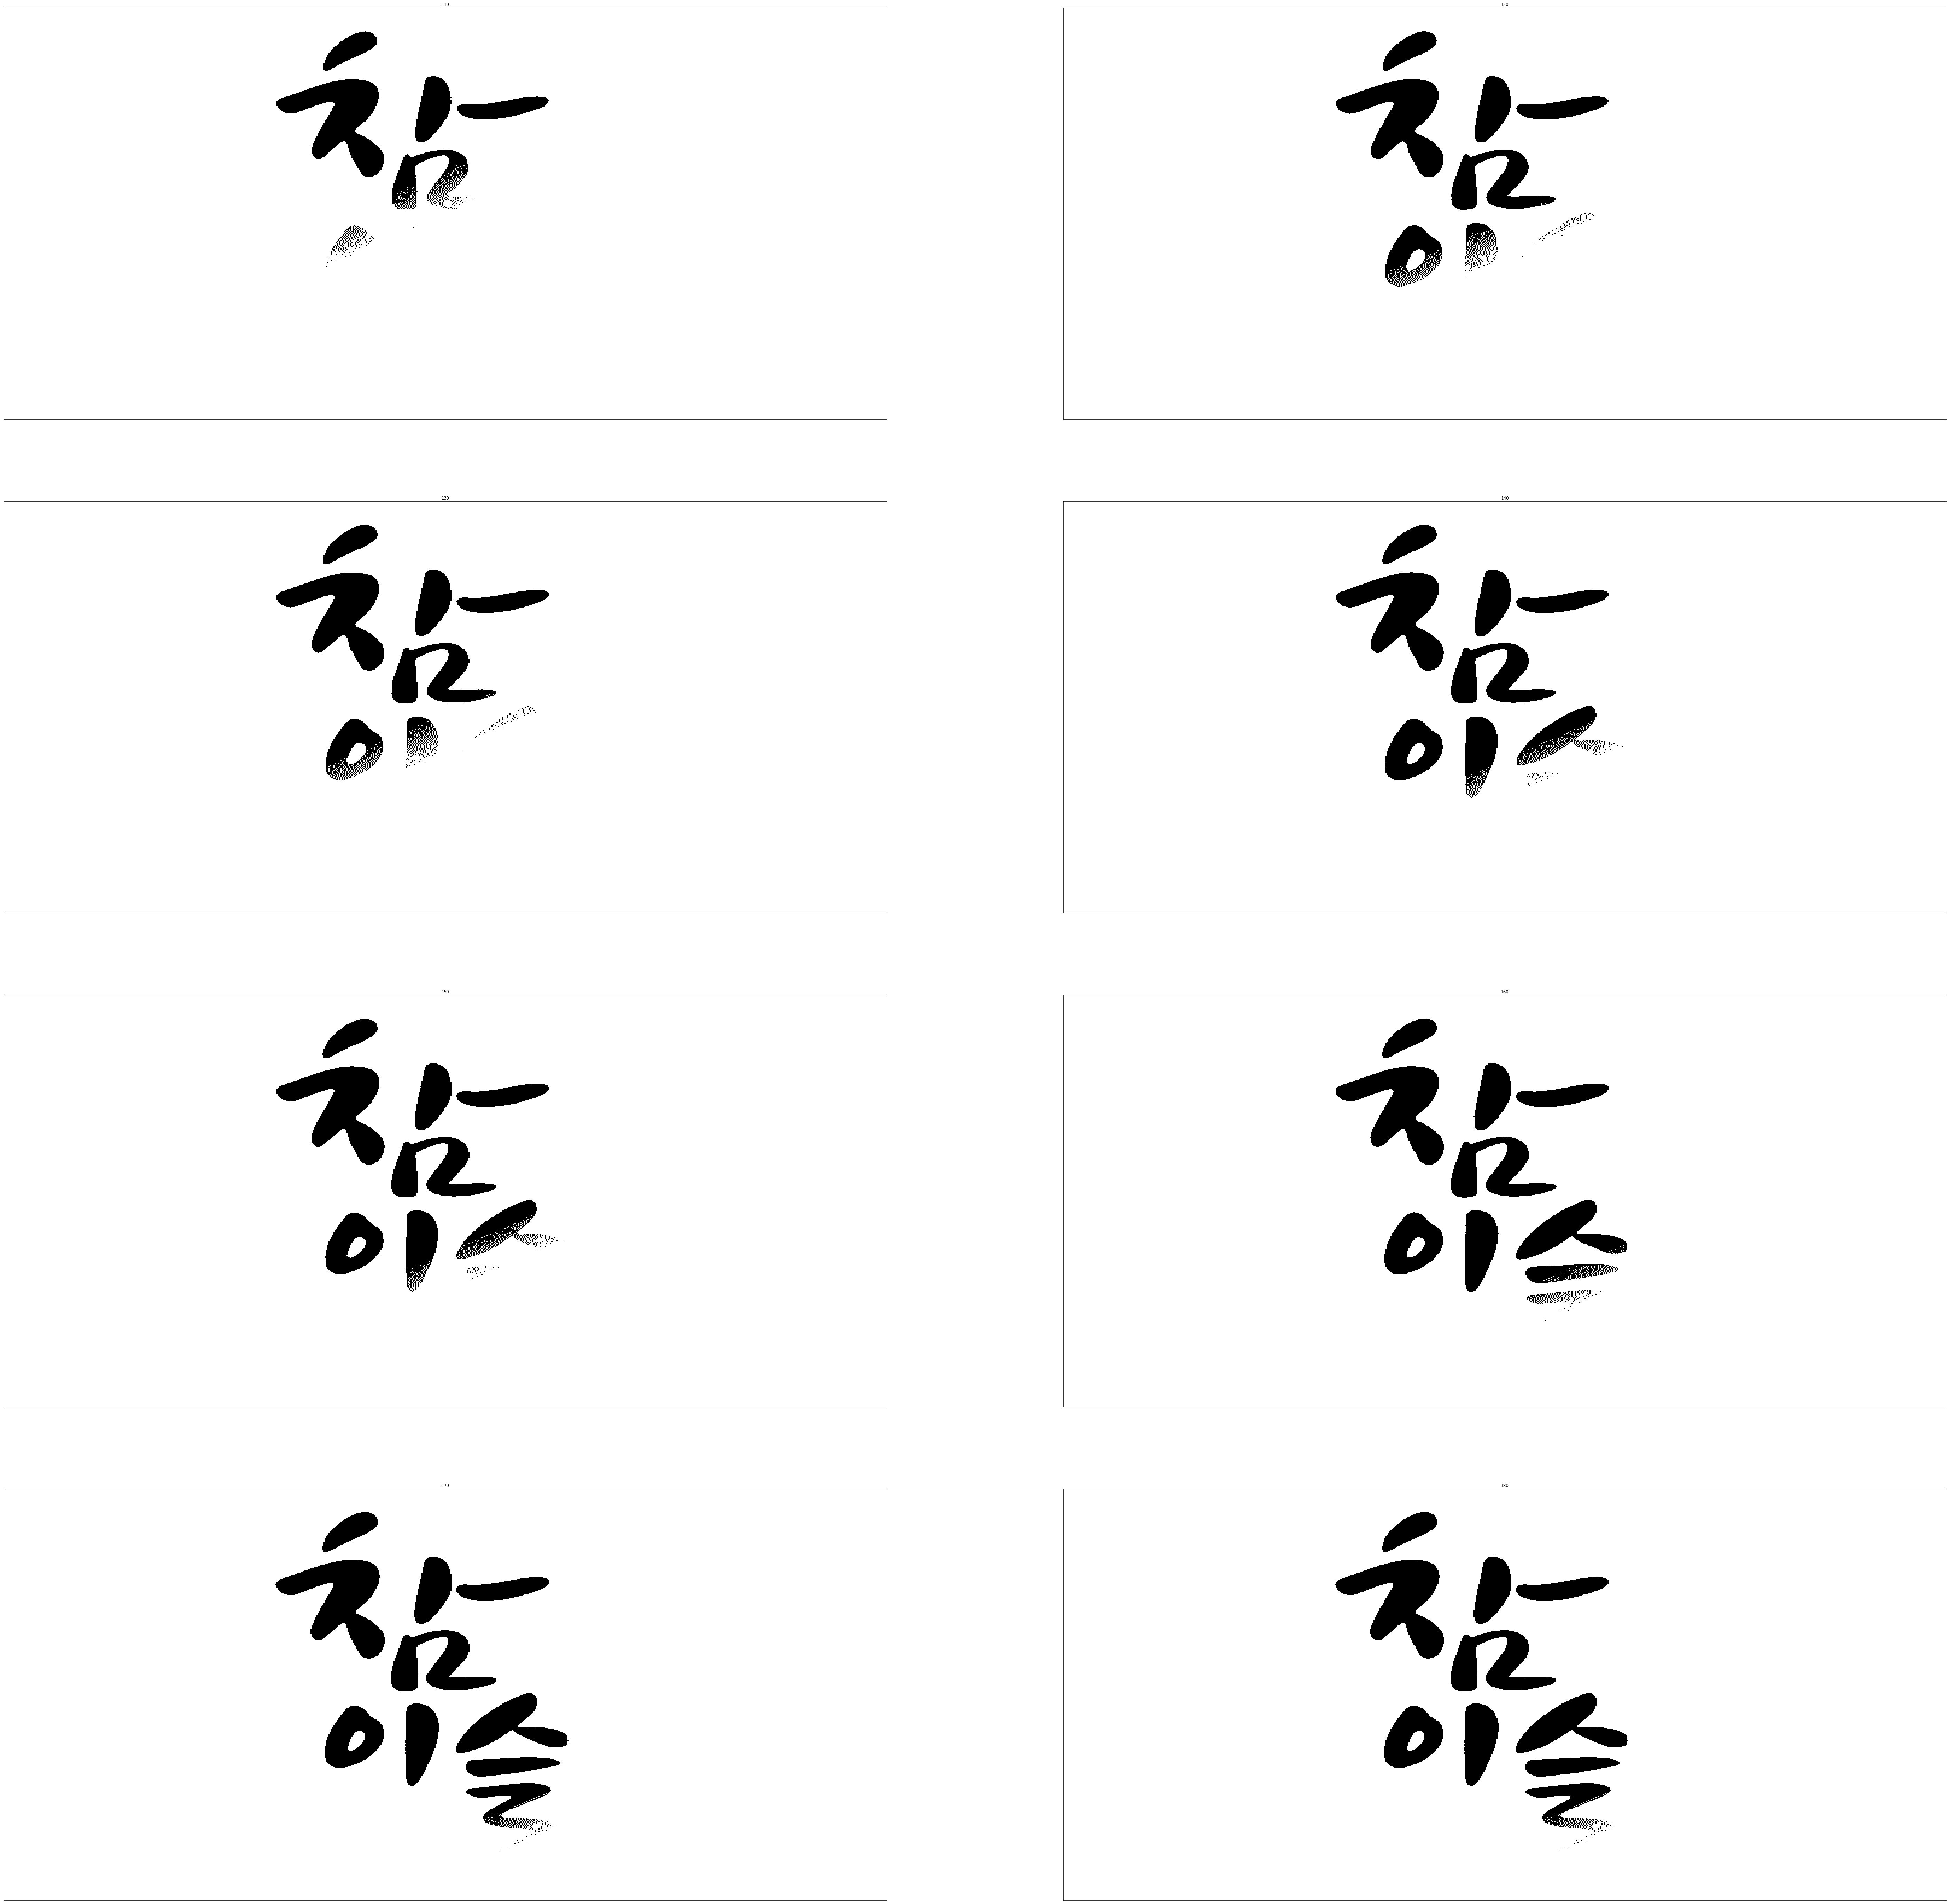

In [3]:
fig = plt.figure(figsize = (100,100))

for i in range(1,9):
    ret, thresh = cv2.threshold(img,100+10*i,255, cv2.THRESH_BINARY)
    plt.subplot(4,2,i)
    plt.title(100+10*i)
    plt.imshow(thresh, interpolation='nearest', aspect='auto')
    plt.xticks([]),plt.yticks([])

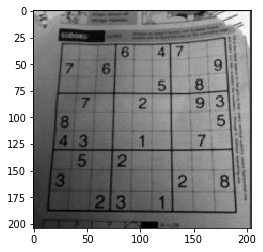

In [4]:
img= cv2.imread('ada_threshold.jpg', cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img, 'gray')

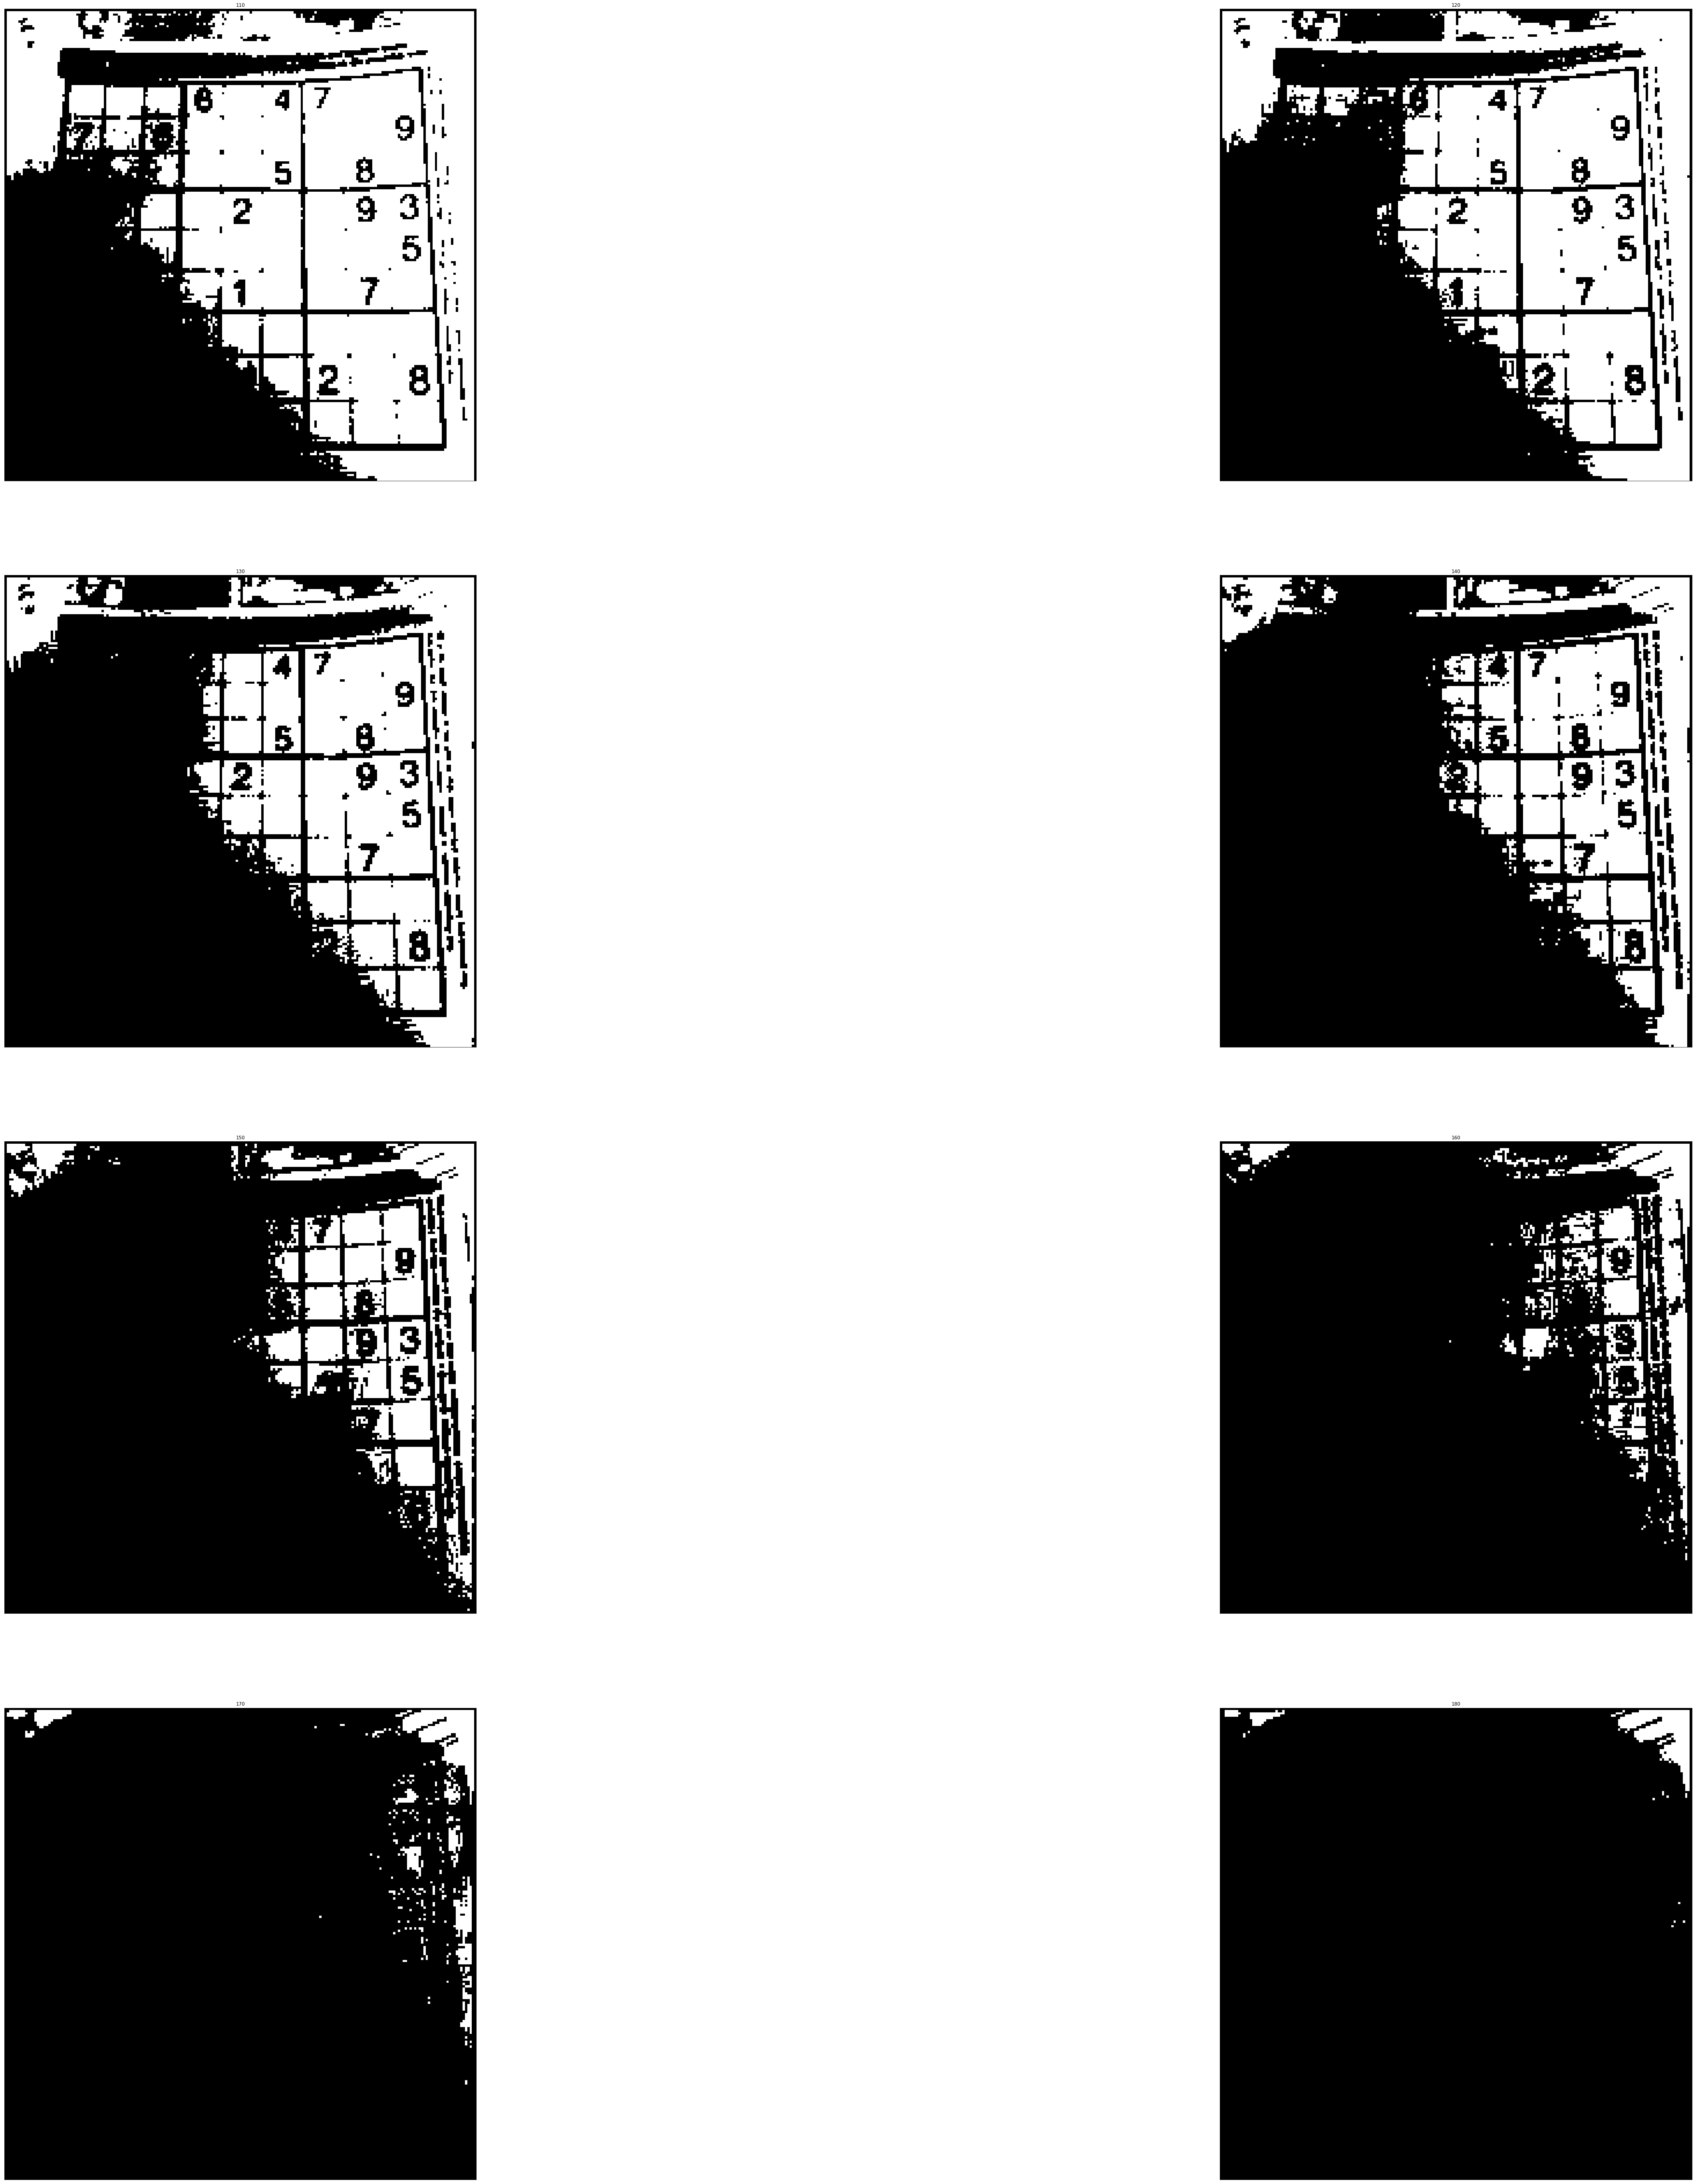

In [5]:
fig = plt.figure(figsize = (100,100))

for i in range(1,9):
    ret, thresh = cv2.threshold(img,100+10*i,255, cv2.THRESH_BINARY)
    plt.subplot(4,2,i)
    plt.title(100+10*i)
    plt.imshow(thresh,'gray')
    plt.xticks([]),plt.yticks([])

In [6]:
print(img.shape)

(204, 204)


In [7]:
img_flat = img.reshape(1, img.shape[0]*img.shape[1])

In [8]:
print(img_flat.shape)

(1, 41616)


In [9]:
A = np.ones((41616, 3), dtype=np.int64)
A.shape

(41616, 3)

In [10]:
for i in range(0,41616):
    A[i,0] = i//204 + 1
    A[i,1] = i%204 + 1

In [11]:
print(A)

[[  1   1   1]
 [  1   2   1]
 [  1   3   1]
 ...
 [204 202   1]
 [204 203   1]
 [204 204   1]]


In [12]:
X = np.matmul(np.linalg.pinv(A),img_flat.T)
print(X.shape)

(3, 1)


In [13]:
LS = np.matmul(A, X)
print(LS.shape)

(41616, 1)


(204, 204)


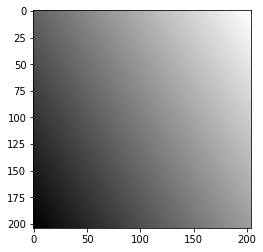

In [14]:
LS_reshape = LS.T.reshape(img.shape[0],img.shape[1])
print(LS_reshape.shape)
plt.imshow(LS_reshape, 'gray')

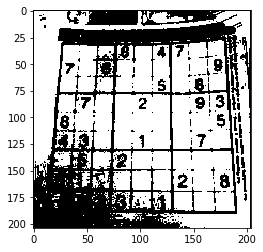

In [16]:
LS_img = np.ones((img.shape[0], img.shape[1]), dtype=np.int64)
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        if(img[i][j] > LS_reshape[i][j]):
            LS_img[i][j] = 100
        else:
            LS_img[i][j] = 0
plt.imshow(LS_img, 'gray')